### Dimensionality/feature reduction and feature engineering steps 

In [250]:
# import required libraries
import pandas as pd
import numpy as np
import string

In [251]:
# load the data into dataframe
df = pd.read_csv('AB_NYC_2019.csv')

In [252]:
# list column names
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [253]:
# Dimensionality reduction - reducing the number of input variables in training data.
# Removing features which are redundant and irrelevant.
df.drop(['id', 'host_id', 'name','host_name','latitude','longitude'], axis = 1, inplace = True)

In [254]:
# display latest features.
df.head(1)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365


In [255]:
# Display type of variables are in the table 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   room_type                       48895 non-null  object 
 3   price                           48895 non-null  int64  
 4   minimum_nights                  48895 non-null  int64  
 5   number_of_reviews               48895 non-null  int64  
 6   last_review                     38843 non-null  object 
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 3.7+ MB


In [256]:
# Generate descriptive statistics
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [257]:
# Generate descriptove statistics. Limit result to strings
df.describe(include = ['O'])

,neighbourhood_group,neighbourhood,room_type,last_review
count,48895,48895,48895,38843
unique,5,221,3,1764
top,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,21661,3920,25409,1413


### Replace headers

In [258]:
# rename columns for readability
df.rename(columns = {'neighbourhood_group': 'Borough', 'neighbourhood':' City', 'room_type': 'Property type', 
                     'price': 'Price', 'minimum_nights': 'Minimum Nights', 'number_of_reviews': 'Total reviews',
                    'last_review':'Recent review','reviews_per_month':'Number of reviews per month',
                     'calculated_host_listings_count':'Amount of listing per host',
                    'availability_365':'Number of days when listing is available for booking'}, inplace = True)
df

,Borough,City,Property type,Price,Minimum Nights,Total reviews,Recent review,Number of reviews per month,Amount of listing per host,Number of days when listing is available for booking
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9
48891,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,36
48892,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6,2


###  Drop Duplicates

In [259]:
# finding duplicates
df.drop_duplicates(inplace = True)
df

,Borough,City,Property type,Price,Minimum Nights,Total reviews,Recent review,Number of reviews per month,Amount of listing per host,Number of days when listing is available for booking
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9
48891,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,36
48892,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6,2


### From above 48895 rows reduced to 47955 rows after removing duplicates.


In [260]:
# Handling missing values where dropping rows with any column having NA/null data

df.dropna(inplace = True)
df

,Borough,City,Property type,Price,Minimum Nights,Total reviews,Recent review,Number of reviews per month,Amount of listing per host,Number of days when listing is available for booking
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,Manhattan,Murray Hill,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...
48782,Manhattan,Upper East Side,Private room,129,1,1,2019-07-07,1.00,1,147
48790,Queens,Flushing,Private room,45,1,1,2019-07-07,1.00,6,339
48799,Staten Island,Great Kills,Private room,235,1,1,2019-07-07,1.00,1,87
48805,Bronx,Mott Haven,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


### From above 9123 rows reduced after dropping rows with any column having NA/null data.

### Identify outliers and bad data

<AxesSubplot:>

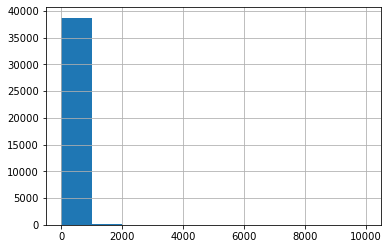

In [261]:
# View outliers using histogram for price feature.
df['Price'].hist(bins = 10, grid = True)

### Histogram doesnt do justice on providing proper outliers. Hence, below we use scatterplot using feature variable 'Property type' to pinpoint outliers of price feature among three different type of variables:  Entire home/apt , Private room or Shared room vs Price

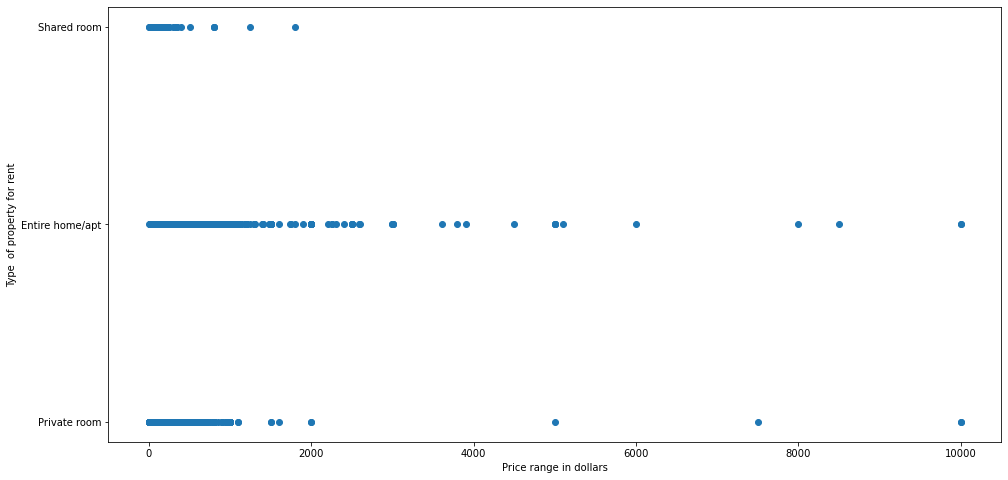

In [262]:
# Use scatterplot to identify outliers
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Price'], df['Property type'])
ax.set_xlabel('Price range in dollars')
ax.set_ylabel('Type  of property for rent')
plt.show()

In [263]:
# get rid of outliers.
df1 = df[df.Price <= 2000]

# check to see if correct

df1.sort_values(['Price'], axis = 0, ascending = True)


,Borough,City,Property type,Price,Minimum Nights,Total reviews,Recent review,Number of reviews per month,Amount of listing per host,Number of days when listing is available for booking
25796,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,2019-06-23,4.35,6,222
26866,Brooklyn,Bushwick,Shared room,0,30,5,2019-05-24,0.26,6,139
26841,Brooklyn,Bushwick,Shared room,0,30,2,2019-06-22,0.11,6,333
25433,Bronx,East Morrisania,Private room,0,2,55,2019-06-24,2.56,4,127
25634,Brooklyn,Bushwick,Private room,0,2,16,2019-05-18,0.71,5,0
...,...,...,...,...,...,...,...,...,...,...
19474,Brooklyn,Bushwick,Private room,2000,5,1,2019-01-05,0.16,1,0
19270,Manhattan,Midtown,Entire home/apt,2000,30,4,2017-03-11,0.12,11,365
7513,Manhattan,Upper West Side,Entire home/apt,2000,30,9,2016-01-28,0.18,11,364
6715,Brooklyn,Bedford-Stuyvesant,Entire home/apt,2000,7,3,2015-12-30,0.05,1,0


#### From above we can see that outliers from three property types are price above $2000. Hence we can remove rows with price 2k and above.

### Convert category value into a new column and assigns a 1 or 0 (True/False) value to the column.

In [264]:
# One hot encoding
pd.get_dummies(df1, columns=["Property type"])


,Borough,City,Price,Minimum Nights,Total reviews,Recent review,Number of reviews per month,Amount of listing per host,Number of days when listing is available for booking,Property type_Entire home/apt,Property type_Private room,Property type_Shared room
0,Brooklyn,Kensington,149,1,9,2018-10-19,0.21,6,365,0,1,0
1,Manhattan,Midtown,225,1,45,2019-05-21,0.38,2,355,1,0,0
3,Brooklyn,Clinton Hill,89,1,270,2019-07-05,4.64,1,194,1,0,0
4,Manhattan,East Harlem,80,10,9,2018-11-19,0.10,1,0,1,0,0
5,Manhattan,Murray Hill,200,3,74,2019-06-22,0.59,1,129,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48782,Manhattan,Upper East Side,129,1,1,2019-07-07,1.00,1,147,0,1,0
48790,Queens,Flushing,45,1,1,2019-07-07,1.00,6,339,0,1,0
48799,Staten Island,Great Kills,235,1,1,2019-07-07,1.00,1,87,0,1,0
48805,Bronx,Mott Haven,100,1,2,2019-07-07,2.00,1,40,1,0,0


#### From above we convert categorical variable from property type into dummy/indicator variables. We can look at the column Property type where we have values of Entire home/apt , Private room or Shared room.  By using get_dummies we can convert this to three columns with a 1 or 0 corresponding to the correct value.  

